#### Music Score
https://www.codingame.com/ide/puzzle/music-scores

In [298]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)
from overwrite_input import *
init_data('test_8_Cs.txt');
# init_data('test_1.txt');

In [306]:
from PIL import Image
# display(Image.fromarray(image.astype(np.uint8)*255))

pil_image = Image.open('in12.png')
image = np.logical_not(np.asarray(pil_image))
# display(Image.fromarray(image))
init_H, init_W = image.shape

In [304]:
import numpy as np
from string import ascii_uppercase

# Parse image to bool array
init_W, init_H = [int(i) for i in input().split()]
enc_img = input().split()

image = np.empty(init_W * init_H, dtype = np.bool_)
pos = 0
for i in range(len(enc_img) // 2):
    C = enc_img[i * 2] == 'B'
    L = int(enc_img[i * 2 + 1])
    image[pos : pos + L] = C
    pos += L
image = image.reshape(init_H, init_W)
image.shape

Exception: End of input

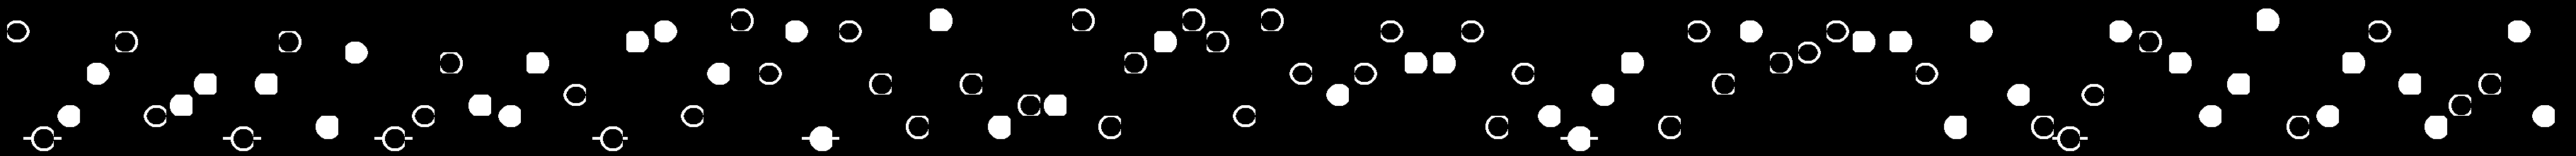

In [308]:

# Store staff parameters -> remove staff
for i in range(init_W):
    col = image[:, i]
    if not col.any(): continue

    staff_pos = col.nonzero()
    staff_l0 = staff_pos[0][0]
    staff_spacing = np.max(np.diff(staff_pos)) - 1
    break

image = np.delete(image[:, i:], staff_pos, axis=0)

# Remove tails
tail_pos = np.sum(image, axis = 0) > (staff_spacing * 1.5)
image = np.delete(image, tail_pos, axis=1)
H, W = image.shape


display(Image.fromarray(image[:, i:].astype(np.uint8)*255))

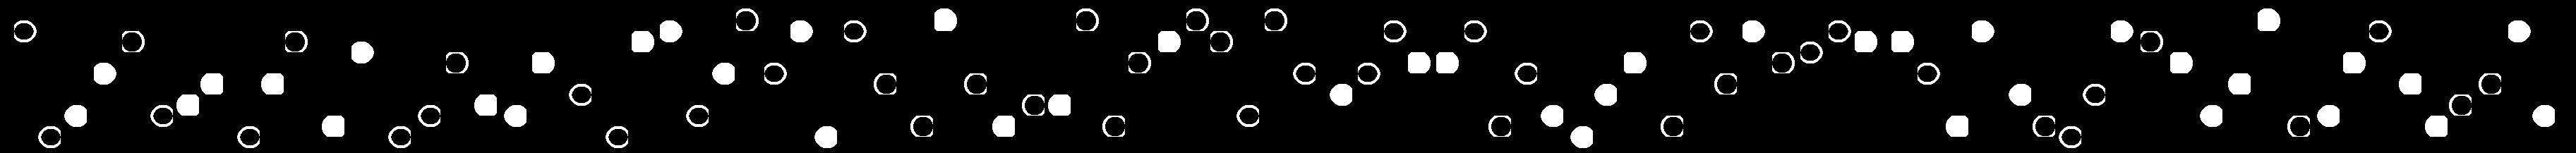

In [319]:

# find C-note
C_line_max = staff_l0 + int(staff_spacing * 5.5)
catch_Cs = image[C_line_max]

# print(staff_l0, staff_spacing)

# backward search for beginning of first C note (forward search connects with other notes in test #11)
if catch_Cs.any():
    C_col = np.nonzero(catch_Cs)[0][staff_spacing // 3]
    for col in range(C_col, C_col - staff_spacing, -1):
        column_with_C = image[:, col]
        crt_C_line_max = np.nonzero(column_with_C)[0][-1] if np.any(column_with_C) else None
        if crt_C_line_max is None or abs(C_line_max - crt_C_line_max) > (staff_spacing * 0.25):
            break
        C_line_max = crt_C_line_max

    # remove skewer of all Cs
    C_line_min = np.nonzero(image[:, col + 1])[0][0]
    C_staff_pos = np.zeros(H, dtype = np.bool_)
    C_staff_pos[C_line_min : C_line_max + 1] = True
    no_Cs_image = np.delete(image, C_staff_pos, axis=0)
    # H, W = image.shape


In [ ]:


# sum heights > record increase and decrease > use middle of boundaries to determine note
note_cols = (np.sum(image, axis = 0) == 0).astype(np.int8)
note_borders = note_cols[:-1] - note_cols[1:]

# Middle columns of notes
note_starts, = np.nonzero(note_borders == 1)
note_ends, = np.nonzero(note_borders == -1)
note_pos_cols = (note_starts + note_ends) // 2
note_cols = image[:, note_pos_cols]

# Get note names and lengths
note_names = (ascii_uppercase[2:7] + ascii_uppercase[0:7])[::-1]
notes = []
for c in note_cols.T:
    note_start_line = c.tolist().index(True)
    n = (note_start_line - staff_l0 + staff_spacing) * 2 / staff_spacing
    note_name = note_names[round(n)]
    note_length = 'Q' if round(sum(c) / staff_spacing) else 'H'
    notes.append(note_name + note_length)
print(' '.join(notes))
